Name of the picture + the data format: ex.png

Prediction: 0


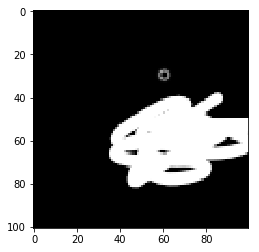

In [9]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import load_model


model = load_model(r"C:\Users\dimet\Desktop\NN\mymodel.h5")

name = r"C:\Users\dimet\Desktop\NN\Samples/" + str(input("Name of the picture + the data format: "))
        
#build in break
        
        
img = cv2.imread(name, 0)
plt.imshow(img, cmap="Greys")
res = cv2.resize(img, (28,28))
imagem = cv2.bitwise_not(res)
# convert the grayscale image to binary image
    
ret,thresh = cv2.threshold(imagem,127,255,0)

# calculate moments of binary image
M = cv2.moments(thresh)
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

row, col = imagem.shape[:2]
vx = (cX - (int(row) / 2)) * (-1)
vy = (cY - (int(col) / 2)) * (-1)
M = np.float32([[1, 0, vx], 
                        [0, 1, vy]]) 
res = cv2.warpAffine(imagem, M, (col, row)) 

#plt.imshow(res, cmap="Greys")

#plt.imshow(imagem, cmap="Greys")
img_a = res / 255.00

img_b = np.reshape(img_a, (1,28,28,1))


a = model.predict(img_b)


b = np.argmax(a)
print("\nPrediction: " + str(b))